<a href="https://colab.research.google.com/github/PhattarasornTeppabut/Multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Scaling คล้ายๆกับบท 3 

---

คือการลดขนาดของตัวแปรจากมากให้เหลือน้อย

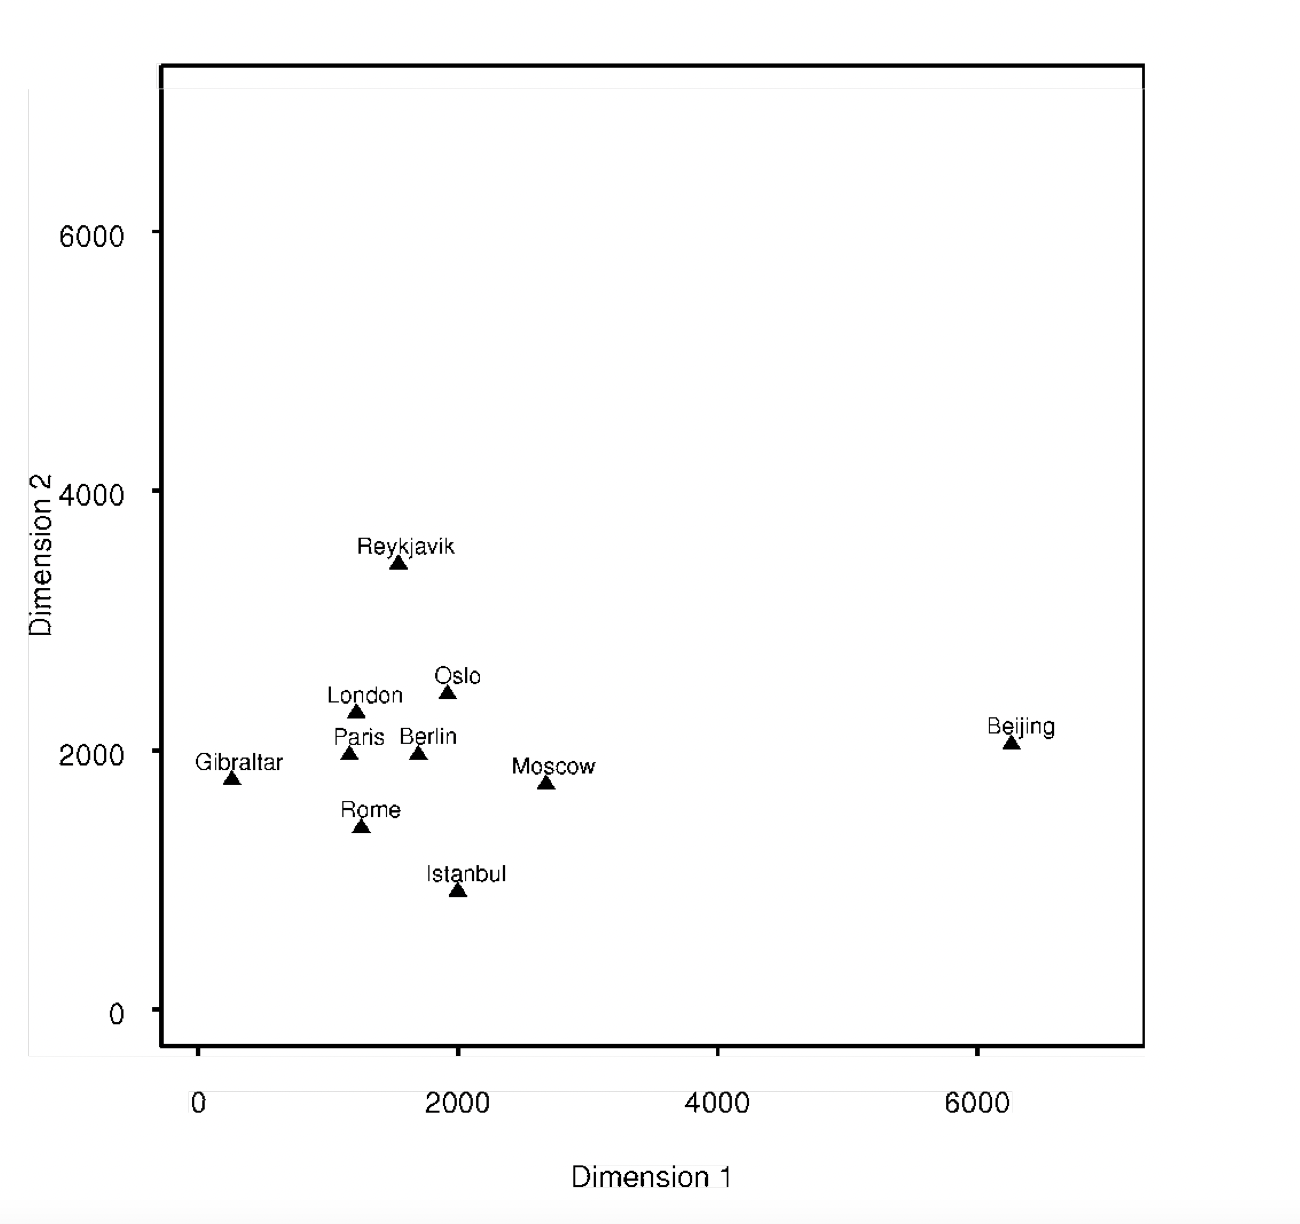

## Example on Iris dataset

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


###ลอง plot PCA เพื่อเปรียบเทียบกับวิธี MDS ว่าแตกต่างกันยังไง

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)

In [5]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [6]:
from matplotlib import pyplot as plt

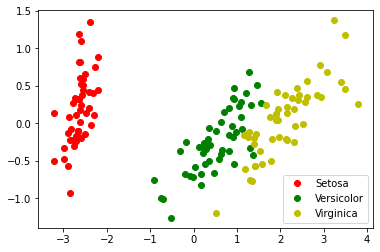

In [7]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

### MDS (Multidimensional Scaling)

ข้อความตัวเอียง#### Distance ระยะห่าง


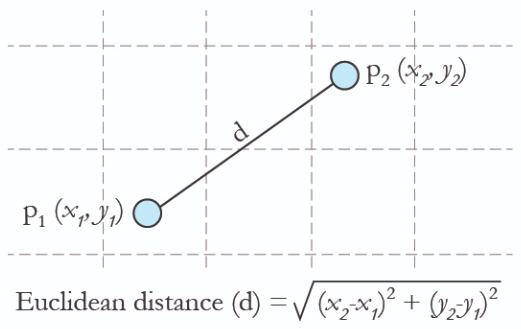

In [8]:
X1 = example_df.iloc[0,:-1].to_numpy() # เอาตั้งเเต่จุดที่ 1 ยกเว้นชื่อมัน
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [9]:
X2 = example_df.iloc[1,:-1].to_numpy() # เอาตั้งเเต่จุดที่ 2 ยกเว้นชื่อมัน
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [10]:
import numpy as np

In [11]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

[ข้อความลิงก์](https://)#Distance Matrix

1.   รายการในลิสต์

1.   *รายการในลิสต์*
2.   รายการในลิสต์


2.   รายการในลิสต์



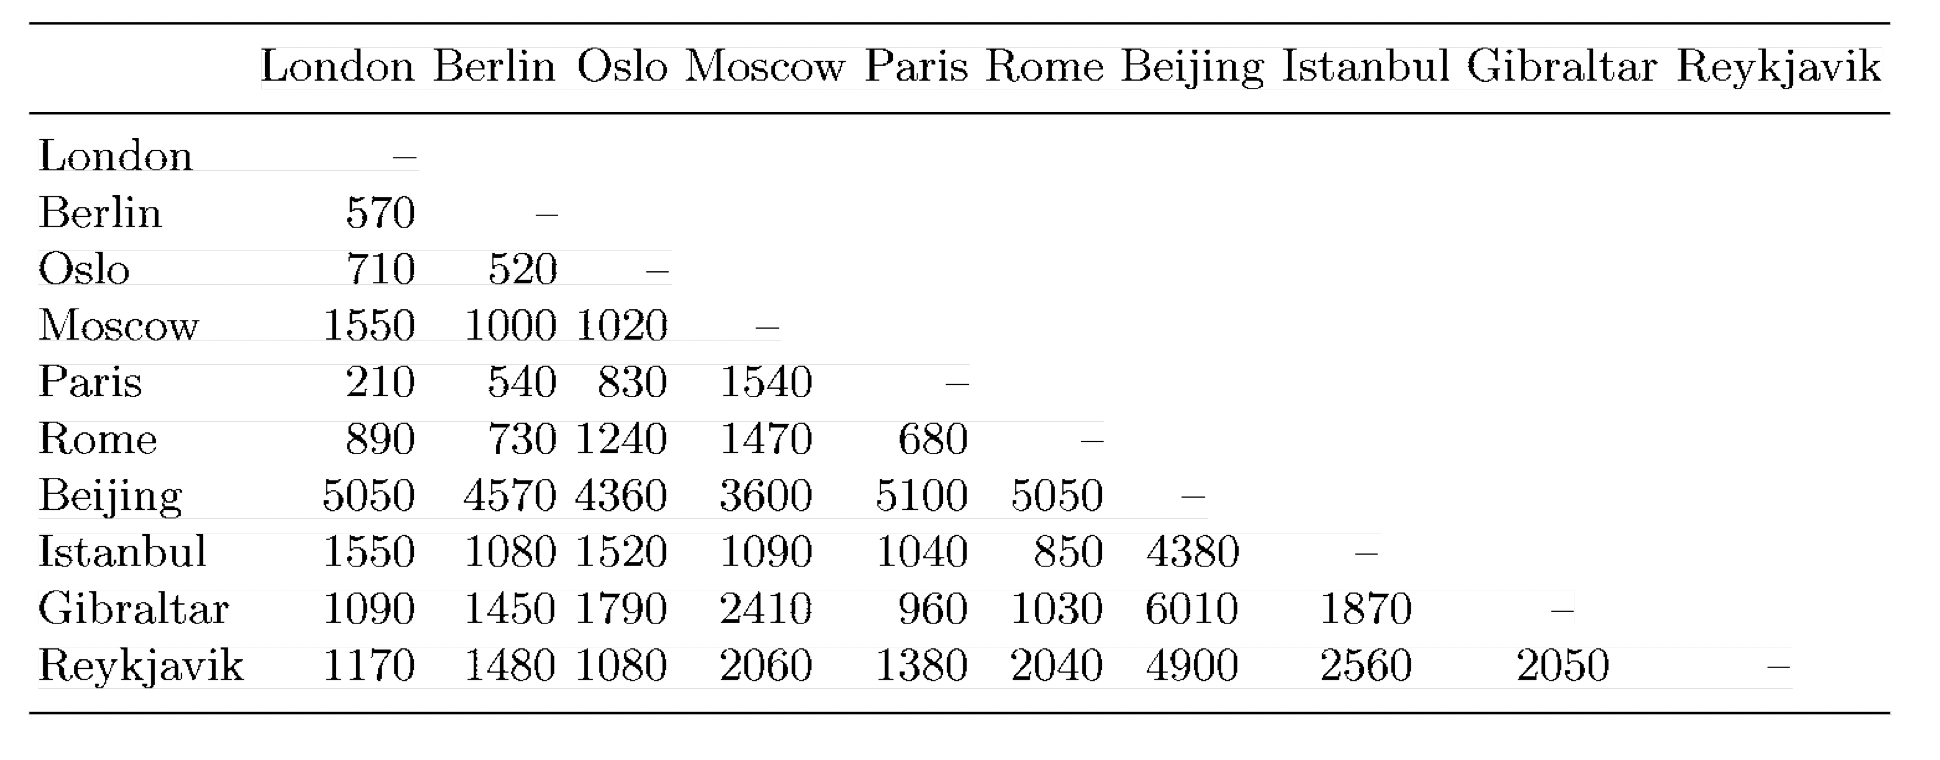

In [12]:
(0.04 + 0.25)**(0.5) # sqrt การยกกำลัง 0.5

0.5385164807134504

## Distance Matrix คือ เเสดงถึงระยะห่างของเเต่ละจุด

In [13]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

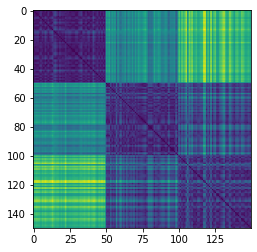

In [14]:
plt.imshow(dis_matrix) #สีสว่างห่างกันมาก สีเข้มห่างกันน้อย

## ทำ MDS

In [15]:
from sklearn.manifold import MDS

In [16]:
mds = MDS(n_components=2)

In [17]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

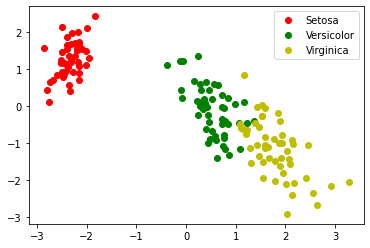

In [18]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

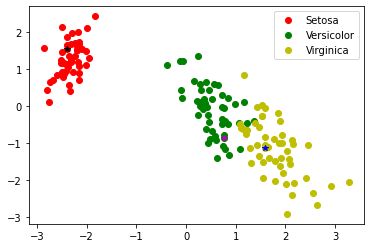

In [19]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()

### การใช้ Pre-computed Distance Matrix

In [20]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock')      

In [21]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [22]:
new_mds2 = mds2.fit_transform(dis_matrix)

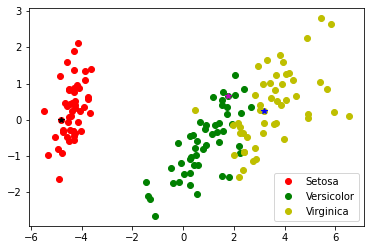

In [23]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()

# Exemple2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html?fbclid=IwAR2jFPcf_Xt7IqQgGliKa4xnWgDTQjJj_rCtEa28GhWb6JAZGcp_Zv3HodM

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [25]:
def make_hello(N=1000, rseed=42): # N คือจำนวนจุด
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [26]:
X = make_hello(1000)

In [27]:
X.shape # ดูขนาดของ X 

(1000, 2)

ลอง plot โดยยังไม่ใส่สี

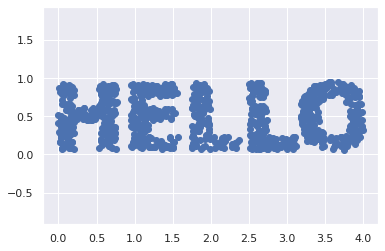

In [28]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');                                  # ทำให้สเกลของเเต่ละเเกนเท่ากัน

In [29]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [30]:
colorize # ดูขนาดของdictionary

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [31]:
colorize['c'].shape 

(1000,)

In [32]:
colorize['cmap']

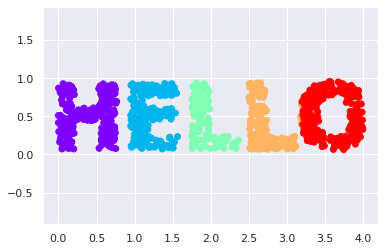

In [33]:
plt.scatter(X[:, 0], X[:, 1], **colorize) # ใส่สี
plt.axis('equal');

## หมุน data

In [34]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

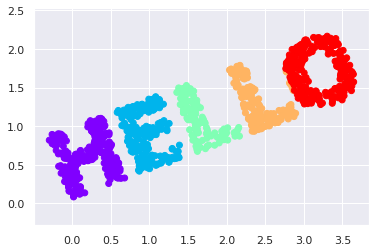

In [35]:
X2 = rotate(X, 20) # บอกว่าหมุนในมุมกี่องศา 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

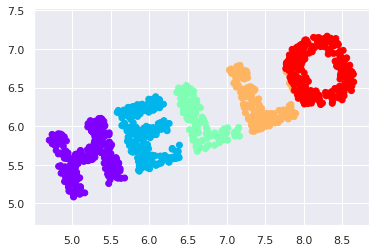

In [36]:
X2 = rotate(X, 20) + 5                                          # +5 คือ เลื่อนแกน X และ แกน Y ไป 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

##MDS

In [37]:
from sklearn.metrics import pairwise_distances              #ดูระยะห่างของจุดแต่ละจุด
D = pairwise_distances(X)
D.shape

(1000, 1000)

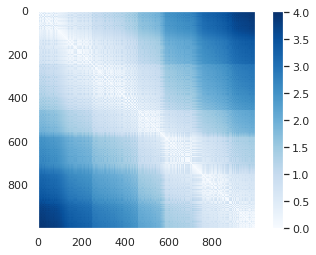

In [38]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest') 
plt.colorbar();

In [40]:
D2 = pairwise_distances(X2)

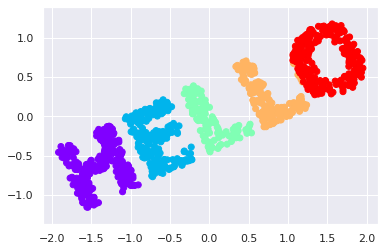

In [41]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

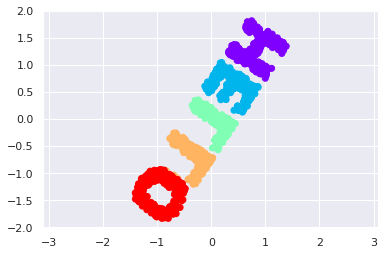

In [42]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### ทดลองทำ pca กับข้อมูล X แล้ว pllotgraph

### และดูผลการกระจายของข้อมูลเปลี่ยนไปหรือไม่อย่างไร


In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)

In [45]:
new_pca = pca.fit_transform(X2)

In [46]:
new_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

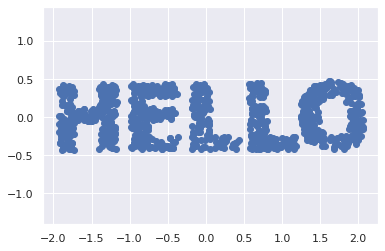

In [47]:
plt.scatter(new_pca[:,0],new_pca[:,1]);  # มีข้อมูลแค่ 2 ตัว จึงเป็นแบบเดิม เมื่อจำนวนข้อมูลเปลี่ยนแปลงถึงจะแตกต่างไปจากเดิม
plt.axis('equal');

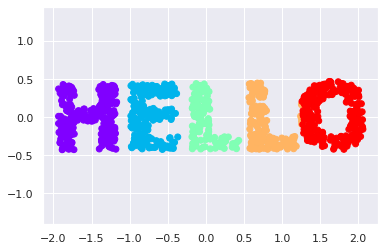

In [48]:
model = PCA(n_components=2 ) ## ใส่PCAทำให้หมุนกลับมาให้เหมือนเดิม
out2 = model.fit_transform(X2)
plt.scatter(out2[:, 0], out2[:, 1], **colorize)
plt.axis('equal');

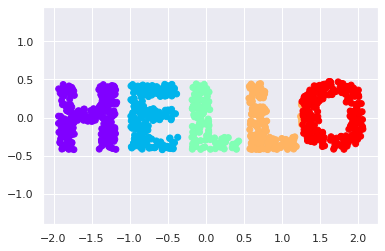

In [49]:
model = PCA(n_components=2 ) ## PCA จะหมุนกลับมาให้เหมือนเดิม หาก dimension ไม่ได้เปลี่ยนจะได้รูปเเบบเดิม
out3 = model.fit_transform(out)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

ข้อเสียของ MDS คือมันช้า คนไม่ค่อยใช้มันเท่าไหร่